## Config

In [2]:
import json
import pandas as pd
import os

In [3]:
# Load the config file
with open('../config/config.json', 'r') as f:
    config = json.load(f)

file_path = config["data_loc"]
file_name = "QTL_text.json"
final_path = os.path.join(file_path, file_name) 

## Import Dataset

In [4]:
# Load json file
df = pd.read_json(final_path)
print(f"Shape of the original dataset: {df.shape}", "\n")

df.head()

Shape of the original dataset: (11278, 5) 



PMID                                            Journal  \
0  17179536                  J Anim Sci. 2007 Jan;85(1):22-30.   
1  17177700         J Anim Breed Genet. 2006 Dec;123(6):414-8.   
2  17129674  Vet Parasitol. 2007 Apr 10;145(1-2):2-10. Epub...   
3  17121599                 Anim Genet. 2006 Dec;37(6):543-53.   
4  17057239  Genetics. 2006 Dec;174(4):2119-27. Epub 2006 O...   

                                               Title  \
0  Variance component analysis of quantitative tr...   
1  Single nucleotide polymorphism identification,...   
2  Genetic resistance to Sarcocystis miescheriana...   
3  Results of a whole-genome quantitative trait l...   
4  Unexpected high polymorphism at the FABP4 gene...   

                                            Abstract  Category  
0  In a previous study, QTL for carcass compositi...         1  
1  Pituitary adenylate cyclase-activating polypep...         0  
2  Clinical and parasitological traits of Sarcocy...         0  
3  A whole-genome quantitative trait locus (QTL) ...         1  
4  Fatty acid bing protein 4 (FABP4) plays a key ...         0

## Pre-processing and other requirements

In [10]:
# "In this project, you will need to use "Abstract" and "Category", and you can ignore the other fields."
df_processed = df[['Abstract', 'Category']]
print(f"Shape before filtering: {df_processed.shape}", "\n")

# "In this project, you need to ignore papers in Category ‘0’."
df_processed = df_processed[df_processed['Category'] == 1]
print(f"Shape after filtering: {df_processed.shape}", "\n")

df_processed.head()

Shape before filtering: (11278, 2) 

Shape after filtering: (1007, 2) 



Abstract  Category
0   In a previous study, QTL for carcass compositi...         1
3   A whole-genome quantitative trait locus (QTL) ...         1
5   A partial genome scan using microsatellite mar...         1
7   BACKGROUND: The rate of pubertal development a...         1
10  Previously, quantitative trait loci (QTL) for ...         1

### Tokenization of Sentences

In [6]:
import spacy
nlp_spacy = spacy.load("en_core_web_sm")

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gabrielvictorgomesferreira/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gabrielvictorgomesferreira/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
# Set stop words
stop_words = set(stopwords.words('english'))

# Set lemmatizer
lemmatizer = WordNetLemmatizer()

# # Using split
# df_processed['abstract_split'] = df_processed['Abstract'].apply(lambda token: [lemmatizer.lemmatize(token.lower()) for token in token.split() if token.isalpha() and len(token)>2 and token not in stop_words])

# # Using spacy
# df_processed['abstract_spacy'] = df_processed['Abstract'].apply(lambda token: [lemmatizer.lemmatize(token.text.lower()) for token in nlp_spacy(token) if token.text.isalpha() and len(token) > 2 and not token.is_stop])

# Using nltk
df_processed['abstract_nltk'] = df_processed['Abstract'].apply(lambda token: [lemmatizer.lemmatize(token.lower().strip()) for token in word_tokenize(token) if len(token)> 2 and token not in stop_words])

df_processed.head()

# https://medium.com/@lingostat/tf-idf-for-text-preprocessing-in-machine-learning-a66b29774040

Abstract  Category  \
0   In a previous study, QTL for carcass compositi...         1   
3   A whole-genome quantitative trait locus (QTL) ...         1   
5   A partial genome scan using microsatellite mar...         1   
7   BACKGROUND: The rate of pubertal development a...         1   
10  Previously, quantitative trait loci (QTL) for ...         1   

                                        abstract_nltk  
0   [previous, study, qtl, carcass, composition, m...  
3   [whole-genome, quantitative, trait, locus, qtl...  
5   [partial, genome, scan, using, microsatellite,...  
7   [background, the, rate, pubertal, development,...  
10  [previously, quantitative, trait, locus, qtl, ...

## Task 1
Use wordcloud to visualize words in this corpus. The figure should be 800*800, with white background color. You will need to generate two word cloud images: 1) use word frequency, and 2) use tf-idf 
You may find the following libraries useful for this task: WordCloud


### 1) Frequency Base

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

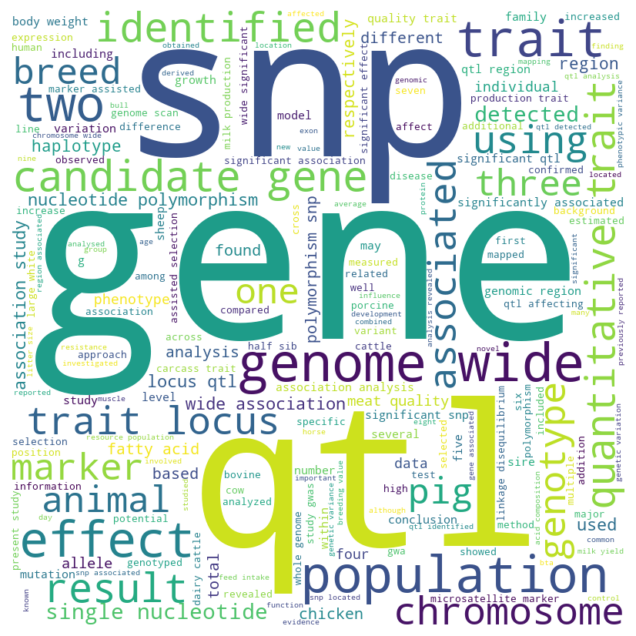

In [13]:
# Define input text
input_text = " ".join([" ".join(words) for words in df_processed['abstract_nltk']])

# Define word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(input_text)

# Display
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2) TD-IDF Base

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [15]:
# df_processed['abstract_nltk'].apply(lambda token: " ".join(token))

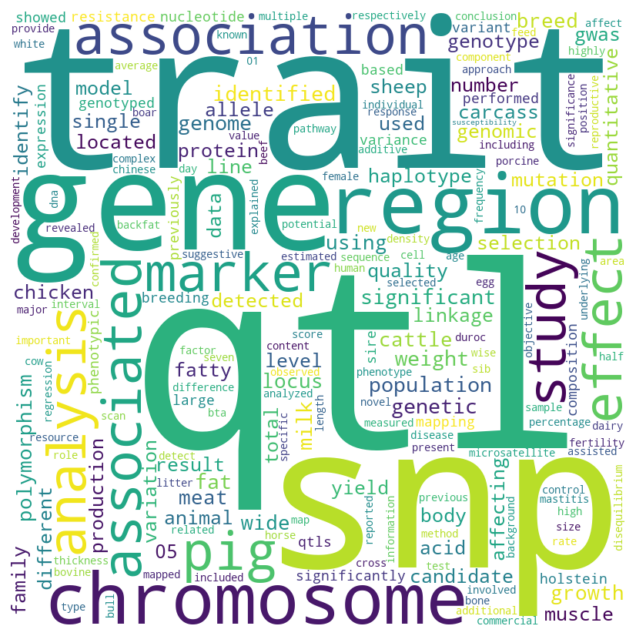

In [16]:
# https://medium.com/@lingostat/tf-idf-for-text-preprocessing-in-machine-learning-a66b29774040

# Compute TF-IDF
tfidf_vec = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vec.fit_transform(df_processed['abstract_nltk'].apply(lambda token: " ".join(token)))
tfidf_scores = np.asarray(tfidf_matrix.mean(axis=0)).flatten()
tfidf_word = dict(zip(tfidf_vec.get_feature_names_out(), tfidf_scores))

# Define word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(tfidf_word)

# Display
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
# top_words

In [18]:
# Sort and print highest ranked words
top_words = sorted(tfidf_word.items(), key=lambda x: x[1], reverse=True)[:10]
top_words_list, top_scores_list = zip(*top_words)
for word, score in top_words:
    print(f"{word}: {round(score, 4)}")

qtl: 0.0651
trait: 0.0489
snp: 0.0484
gene: 0.0411
region: 0.0291
chromosome: 0.0277
association: 0.0266
associated: 0.0266
analysis: 0.0261
marker: 0.026


## Task 2 

Train a Word2Vec model on this corpus, with the following parameters
vector_size=100, window=5, min_count=10
For each of the top 10 tf-idf words, print the 20 most similar words.

In [10]:
import gensim

In [20]:
# Document body
abstract_nltk = df_processed['abstract_nltk']

# Define model Word2Vec model
word2vec_model = gensim.models.Word2Vec(
    vector_size=100,
    window=5,
    min_count=10)

# Build Vocabulary
word2vec_model.build_vocab(abstract_nltk)

# Train model
word2vec_model.train(abstract_nltk, total_examples=word2vec_model.corpus_count, epochs=word2vec_model.epochs)

## https://www.youtube.com/watch?v=Q2NtCcqmIww

(526238, 755950)

In [21]:
# Dictionary to save values
most_similar_dict = {}

# Print and collect vales
for word in top_words:
    similar_words = word2vec_model.wv.most_similar(word[0], topn=20)
    print(f"{word[0]} → {', '.join([w[0] for w in similar_words])}")

    most_similar_dict[word[0]] = [(str(w[0]) + ":" + str(round(w[1], 4))) for w in similar_words]

# Create data-frame
df_test = pd.DataFrame.from_dict(most_similar_dict, orient='index')
df_test.index = range(1, len(df_test) + 1)
df_test.columns = [f"Similar {i+1}" for i in range(df_test.shape[1])]
df_test.insert(0, "Top Word", top_words_list)
df_test.insert(1, "TF-IDF Score", [round(score, 4) for score in top_scores_list])

df_test

qtl → qtls, detected, mapped, previously, chromosome, reported, identified, suggestive, locus, several, chromosomal, chromosome-wide, region, one, harbouring, ssc, putative, vicinity, four, coincided
trait → affecting, locus, growth, quantitative, fatness, carcass, fertility, influencing, meat, bone, quality, related, economically, qtls, affect, production, eggshell, endocrine, complex, performance
snp → exon, intron, p-values, single-nucleotide, haplotype, polymorphism, single, nucleotide, three, two, five, revealed, flanking, seven, within, showed, six, one, four, array
gene → candidate, positional, bovine, mutation, functional, region, novel, plausible, potential, pathway, several, involved, variant, located, reported, porcine, within, close, scd, coding
region → identified, located, within, novel, previously, reported, chromosome, one, several, close, mapped, detected, candidate, positional, putative, bovine, mutation, chromosomal, vicinity, qtl
chromosome → detected, identified, s

Top Word  TF-IDF Score              Similar 1              Similar 2  \
1           qtl        0.0651            qtls:0.9678        detected:0.9464   
2         trait        0.0489       affecting:0.9423           locus:0.8698   
3           snp        0.0484            exon:0.9313           intron:0.921   
4          gene        0.0411       candidate:0.9605      positional:0.9296   
5        region        0.0291      identified:0.9771         located:0.9639   
6    chromosome        0.0277        detected:0.9824      identified:0.9548   
7   association        0.0266     genome-wide:0.9546        analysis:0.9268   
8    associated        0.0266           found:0.9256             also:0.909   
9      analysis        0.0261      regression:0.9612  disequilibrium:0.9529   
10       marker        0.0260  microsatellite:0.9759        interval:0.9392   

              Similar 3                 Similar 4            Similar 5  \
1         mapped:0.9457         previously:0.9432      chromosome:0.93   
2         growth:0.8678       quantitative:0.8667       fatness:0.8592   
3       p-values:0.9117  single-nucleotide:0.9093     haplotype:0.9068   
4         bovine:0.8736           mutation:0.8626    functional:0.8447   
5         within:0.9432              novel:0.9347    previously:0.9307   
6     suggestive:0.9457                one:0.9444        located:0.939   
7           gwas:0.9261                gwa:0.8966      revealed:0.8914   
8   significantly:0.894            located:0.8566  respectively:0.8451   
9        linkage:0.9489           approach:0.9399       mapping:0.9383   
10       mapping:0.9371         regression:0.9369        across:0.9293   

              Similar 6          Similar 7           Similar 8  ...  \
1       reported:0.9031  identified:0.8985   suggestive:0.8893  ...   
2         carcass:0.821   fertility:0.8127  influencing:0.7976  ...   
3   polymorphism:0.9022      single:0.8987   nucleotide:0.8964  ...   
4         region:0.8344         novel:0.83     plausible:0.811  ...   
5       reported:0.9289  chromosome:0.9111          one:0.9049  ...   
6              qtl:0.93       found:0.9176  significant:0.9161  ...   
7      conducted:0.8823      mapping:0.873   regression:0.8721  ...   
8            bta:0.8437       close:0.8349     coincided:0.831  ...   
9    association:0.9268         gwa:0.9231  genome-wide:0.9209  ...   
10      approach:0.9293      method:0.9248     covering:0.9212  ...   

                  Similar 11                Similar 12           Similar 13  \
1         chromosomal:0.8504    chromosome-wide:0.8504        region:0.8497   
2             quality:0.7913            related:0.7904  economically:0.7881   
3                 five:0.882           revealed:0.8736      flanking:0.8633   
4             several:0.8064           involved:0.8051       variant:0.8016   
5              mapped:0.8777            detected:0.875     candidate:0.8731   
6              mapped:0.9094    chromosome-wide:0.9016          qtls:0.8958   
7   single-nucleotide:0.8594           interval:0.8578           the:0.8556   
8               bta14:0.8147         chromosome:0.8142           one:0.8055   
9               mixed:0.9164               test:0.9102          gwas:0.9083   
10          ovinesnp50:0.904  single-nucleotide:0.9034  high-density:0.9032   

           Similar 14          Similar 15              Similar 16  \
1          one:0.8453   harbouring:0.8442              ssc:0.8373   
2         qtls:0.7863       affect:0.7854       production:0.7808   
3        seven:0.8539       within:0.8491           showed:0.8461   
4      located:0.7996     reported:0.7967          porcine:0.7953   
5   positional:0.8726     putative:0.8701           bovine:0.8686   
6   previously:0.8925       within:0.8763         reported:0.8671   
7    performed:0.8536  marker-trait:0.851          perform:0.8481   
8    contained:0.8053     detected:0.8039             near:0.8039   
9       marker:0.9078   line-cross:0.9028        

## Task 3
Extract phrases and repeat task 1 and 2. You can be creative in phrase extraction. 


In [22]:
from gensim.models.phrases import Phraser, Phrases

In [23]:
# https://tedboy.github.io/nlps/generated/generated/gensim.models.Phrases.html

# Document Body
abstract_tokenized = df_processed['abstract_nltk']

#### Built-in TfidfVectorizer Bigram and Trigram

In [24]:
# Compute TF-IDF
tfidf_vec = TfidfVectorizer(ngram_range=(2, 3), stop_words='english')
tfidf_matrix = tfidf_vec.fit_transform(abstract_tokenized.apply(lambda token: " ".join(token)))

tfidf_scores = np.asarray(tfidf_matrix.mean(axis=0)).flatten()
tfidf_word = dict(zip(tfidf_vec.get_feature_names_out(), tfidf_scores))

# Sort highest ranked words
top_words = sorted(tfidf_word.items(), key=lambda x: x[1], reverse=True)[:10]
top_words_list, top_scores_list = zip(*top_words)

for word, score in top_words:
    print(f"{word}: {round(score, 4)}")

genome wide: 0.0094
candidate gene: 0.0084
fatty acid: 0.0076
quantitative trait: 0.0073
trait locus: 0.007
quantitative trait locus: 0.0069
meat quality: 0.0066
single nucleotide: 0.006
nucleotide polymorphism: 0.0059
single nucleotide polymorphism: 0.0059


In [25]:
# Get the list of bigrams and trigrams
ngrams = tfidf_vec.get_feature_names_out()
ngrams = set(ngrams)
print(f"Number of good phrases in the trait dictionary: {len(ngrams)}")
print(ngrams)

Number of good phrases in the trait dictionary: 201378
{'rate risk', 'protein mrna level', 'avoiding iteration', 'knowledge gene result', 'aim better', 'abcg2 ibsp mepe', 'ssc mir 185', 'determine new genomic', 'line sample 230', 'thickness lean meat', 'delta like', 'associated 001 carcass', 'hpa hypothalamus', 'result open new', '586 cow', 'variance compelling candidate', '582 canadian angus', 'body frame', 'detected ssc7 qtl', 'analysis commonly evaluated', 'tumor develop maximum', 'cattle major qtl', 'phenotyped feed intake', 'responsible highly prolific', 'liver fatty', 'significant parent origin', 'androstenone causative', '2283 2065', 'compared genotype', 'polymorphism erythrocyte', 'ranging size', 'region muscle fatty', 'demonstrated located', 'sire heterozygous heifer', 'cross result', 'fto pla2g6 tmem38b', 'kbp window', 'respect estimated', 'subunit difference adg', 'ulceration ssc12', 'undetermined requires', 'disease resistance body', 'gestation trait total', 'fraction integ

#### Gensim Bigram and Trigram

In [26]:
# Bigram and trigram
bigram = Phraser(Phrases(abstract_tokenized, min_count=2, threshold=15))
trigram = Phraser(Phrases(bigram[abstract_tokenized], min_count=2, threshold=15))
bigram_token = [bigram[doc] for doc in abstract_tokenized]
trigram_token = [trigram[bigram[doc]] for doc in abstract_tokenized]
bigram_text = " ".join([" ".join(token) for token in bigram_token])
trigram_text = [" ".join(token) for token in trigram_token]
print(bigram_token[0])
print(bigram_text)

['previous_study', 'qtl', 'carcass_composition', 'meat_quality', 'identified', 'commercial', 'finisher', 'cross', 'the', 'main_objective', 'current_study', 'confirm', 'fine_map', 'qtl', 'ssc4', 'ssc11', 'genotyping', 'increased', 'number', 'individual', 'marker', 'analyze_data', 'using', 'combined_linkage', 'linkage_disequilibrium', 'analysis', 'method', 'modified', 'version', 'method', 'excludes', 'linkage_disequilibrium', 'information', 'analysis', 'enabling', 'comparison', 'result', 'based', 'linkage', 'information', 'result', 'based', 'combined_linkage', 'linkage_disequilibrium', 'information', 'nine', 'additional', 'paternal_half-sib', 'family', 'genotyped', 'marker', 'resulting', 'total', '1,855', 'animal_genotyped', 'marker', 'ssc4', 'ssc11', 'respectively', 'the', 'qtl_affecting', 'meat_color', 'ssc4', 'confirmed', 'whereas', 'qtl_affecting', 'weight', 'could_confirmed', 'the', 'combined_linkage', 'linkage_disequilibrium', 'analysis', 'resulted', 'identification', 'new', 'signi

##### Frequency Based

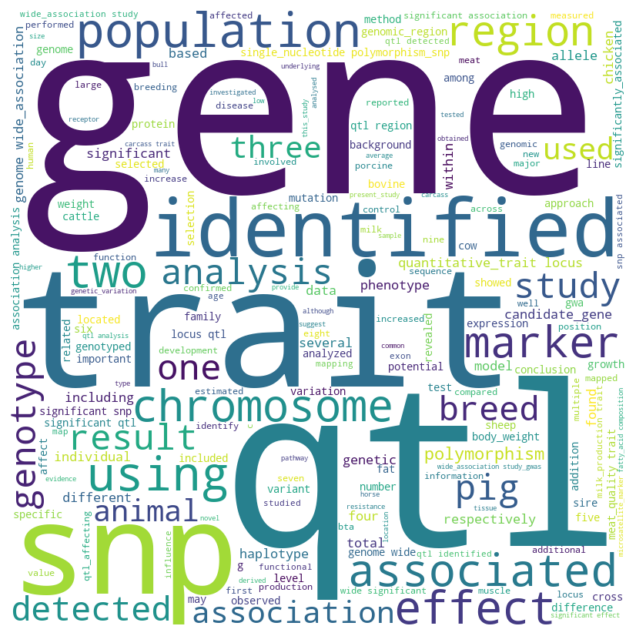

In [27]:
# Define word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(bigram_text)

# Display
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### TF-IDF Score Base

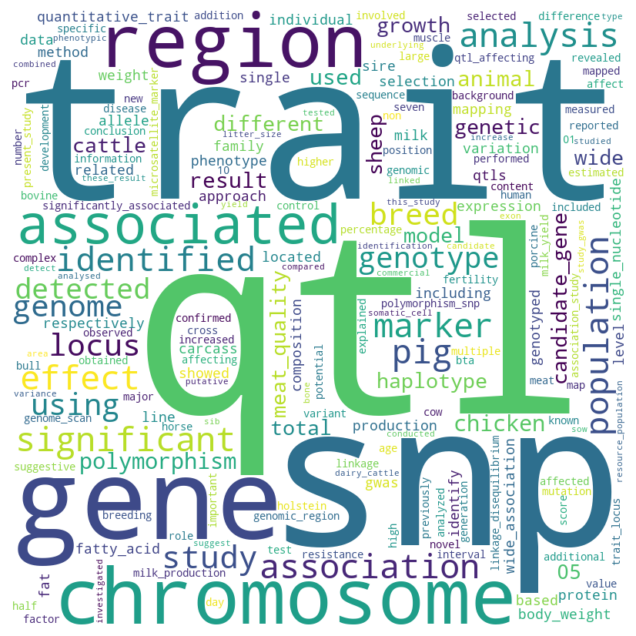

In [28]:
# Compute TF-IDF
tfidf_vec = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vec.fit_transform([" ".join(token) for token in bigram_token])

tfidf_scores = np.asarray(tfidf_matrix.mean(axis=0)).flatten()
tfidf_word = dict(zip(tfidf_vec.get_feature_names_out(), tfidf_scores))

# Define word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(tfidf_word)

# Display
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
# Sort highest ranked words
top_words = sorted(tfidf_word.items(), key=lambda x: x[1], reverse=True)[:10]
top_words_list, top_scores_list = zip(*top_words)

for word, score in top_words:
    print(f"{word}: {round(score, 4)}")

qtl: 0.0629
trait: 0.0466
snp: 0.0444
gene: 0.0352
chromosome: 0.0272
region: 0.0251
associated: 0.0243
significant: 0.0237
marker: 0.0234
association: 0.0229


##### Task 3 - Task 2

In [30]:
# Define model Word2Vec model
word2vec_model = gensim.models.Word2Vec(
    vector_size=100,
    window=5,
    min_count=10)

# Build Vocabulary
word2vec_model.build_vocab(bigram_token)

# Train model
word2vec_model.train(bigram_token, total_examples=word2vec_model.corpus_count, epochs=word2vec_model.epochs)


(393663, 642070)

In [31]:
# Dictionary to save values
most_similar_dict = {}

# Print and collect vales
for word in top_words:
    similar_words = word2vec_model.wv.most_similar(word[0], topn=20)
    print(f"{word[0]} → {', '.join([w[0] for w in similar_words])}")

    most_similar_dict[word[0]] = [(str(w[0]) + ":" + str(round(w[1], 4))) for w in similar_words]

# Create data-frame
df_test = pd.DataFrame.from_dict(most_similar_dict, orient='index')
df_test.index = range(1, len(df_test) + 1)
df_test.columns = [f"Similar {i+1}" for i in range(df_test.shape[1])]
df_test.insert(0, "Top Word", top_words_list)
df_test.insert(1, "TF-IDF Score", [round(score, 4) for score in top_scores_list])

df_test

qtl → chromosome, qtls, region, detected, suggestive, located, one, identified, found, genome-wide, mapped, four, level, respectively, several, additional, bta, significant, chromosome-wide_level, revealed
trait → growth, important, meat, complex, milk_production, affect, may, carcass, production, meat_quality, genetic_architecture, livestock, milk_protein, selection, economically_important, background, increase, affecting, feed_intake, body_composition
snp → significant, genome-wide, found, located, respectively, suggestive, association, four, three, identified, one, significantly_associated, detected, two, five, level, total, 0.05, marker, revealed
gene → candidate_gene, positional_candidate, involved, porcine, known, coding, protein, sequence, receptor, candidate, bovine, variant, present_study, potential, function, mutation, this_study, igf1, functional, pathway
chromosome → qtl, located, identified, significant, suggestive, detected, region, genome-wide, one, found, qtls, four, re

Top Word  TF-IDF Score              Similar 1  \
1           qtl        0.0629      chromosome:0.9922   
2         trait        0.0466          growth:0.9967   
3           snp        0.0444     significant:0.9931   
4          gene        0.0352  candidate_gene:0.9961   
5    chromosome        0.0272             qtl:0.9922   
6        region        0.0251         located:0.9962   
7    associated        0.0243  located_within:0.9973   
8   significant        0.0237     genome-wide:0.9932   
9        marker        0.0234      additional:0.9974   
10  association        0.0229           total:0.9949   

                      Similar 2                        Similar 3  \
1                   qtls:0.9917                      region:0.99   
2              important:0.9965                      meat:0.9964   
3             genome-wide:0.991                     found:0.9848   
4   positional_candidate:0.9948                  involved:0.9943   
5                located:0.9894                identified:0.9885   
6                    one:0.9956                  detected:0.9954   
7                  close:0.9973        highly_significant:0.9967   
8                    snp:0.9931                suggestive:0.9901   
9                   five:0.9973                     three:0.9973   
10                 three:0.9939  significantly_associated:0.9934   

             Similar 4              Similar 5          Similar 6  \
1      detected:0.9895      suggestive:0.9881     located:0.9858   
2       complex:0.9961  milk_production:0.996       affect:0.996   
3       located:0.9843     respectively:0.984   suggestive:0.984   
4       porcine:0.9942           known:0.9942      coding:0.9942   
5   significant:0.9884      suggestive:0.9882    detected:0.9877   
6     identified:0.994            qtls:0.9937  suggestive:0.9933   
7         novel:0.9966         several:0.9965    putative:0.9965   
8       located:0.9895      chromosome:0.9884       found:0.9878   
9        family:0.9972             six:0.9972    revealed:0.9971   
10         five:0.9932          showed:0.9931       marker:0.992   

             Similar 7           Similar 8  ...                   Similar 11  \
1           one:0.9852   identified:0.9842  ...                mapped:0.9807   
2           may:0.9959      carcass:0.9959  ...  genetic_architecture:0.9953   
3   association:0.9824         four:0.9822  ...                   one:0.9816   
4       protein:0.9938     sequence:0.9936  ...                bovine:0.9935   
5        region:0.9864  genome-wide:0.9857  ...                  qtls:0.9817   
6         found:0.9931         four:0.9925  ...              revealed:0.9909   
7         these:0.9964         ssc7:0.9964  ...             explained:0.9963   
8    identified:0.9871     detected:0.9866  ...                  four:0.9823   
9          seven:0.997       single:0.9969  ...                within:0.9967   
10          two:0.9915         exon:0.9911  ...             haplotype:0.9907   

                         Similar 12                             Similar 13  \
1                       four:0.9791                           level:0.9783   
2                  livestock:0.9953                    milk_protein:0.9953   
3   significantly_associated:0.9806                        detected:0.9802   
4                    variant:0.9934                   present_study:0.9932   
5                       four:0.9766                    respectively:0.9762   
6                 additional:0.9905                          within:0.9903   
7                   addition:0.9962                            also:0.9962   
8                      level:0.9796                             two:0.9784   
9                       nine:0.9966                        analysis:0.9965   
10                  revealed:0.9903  single-nucleotide_polymorphism:0.9901   

                  Similar 14                     Similar 15  \
1        respectively:0.9779                 several:0.9766   
2           selection:0.99

#### Main result: 
- 3.	How many phrases you extracted can be found in the trait dictionary (by exact string matching)? 

In [32]:
file_name = "Trait dictionary.txt"
final_path = os.path.join(file_path, file_name) 

# Read trait dictionary file
with open(final_path, "r", encoding="utf-8") as file:
    trait_phrases = set([phrase.lower().strip() for phrase in file if phrase.strip()])

print(f"Number of good phrases in the trait dictionary: {len(trait_phrases)}")
print(trait_phrases)

Number of good phrases in the trait dictionary: 22719
{'milk palmitelaidic acid content', 'glycosylated serum protein', 'cochlear hair bundle tip links', 'hydronephrosis severity measurement', 'sternum morphology trait', 'serum lactate dehydrogenase activity level', 'circulating il-13 level', 'capsula glomeruli', 'vasoconstriction', 'gamma-delta intraepithelial t-lymphocyte morphology', 'corpus luteum number', 'benign colorectal neoplasm prevalence', 'lymphocyte count', 'absolute change in food intake volume', 'dn2 immature t cell', 'lymphocyte chemoattractant factor secretion', 'blood non-specified leukocyte', 'esophageal smooth muscle morphology', 'liver molecular composition trait', 'il2 secretion', 'behavioral response to novel object', 'tcrgd cell', 'calculated blood vessel endothelium', 'iris pigmentation trait', 'trigeminal motor nucleus size', 'sebaceous gland size trait', 'band neutrophil granulocyte count', "schwalbe's ring morphology trait", 'iliac artery integrity trait', '

In [33]:
bi_unique = set()
bi_good_phrases = [[token for token in doc if "_" in token] for doc in bigram_token]
bi_good_phrases = [[token.replace("_", " ") for token in doc] for doc in bi_good_phrases]

for doc in bi_good_phrases:
    bi_unique.update(doc) 

print(f"Number of good phrases in the trait dictionary: {len(bi_unique)}")
print(bi_unique)

Number of good phrases in the trait dictionary: 2771
{'method detecting', 'factor igf1', 'marker added', 'controlled multiple', 'connective tissue', 'similar position', 'single nucleotide', 'conformational polymorphism', 'narrow confidence', 'classical swine', 'sexual ornament', 'method applied', 'due low', 'danish red', 'abdominal fat', 'step forward', 'may provide', 'completely linked', 'regulator muscle', 'rfi measure', 'nba tnb', 'sc german', 'measured loin', 'weaned piglet', 'fertility treatment', 'lamb per', 'c16:1 n-7', 'located upstream', 'affecting economically', 'qtls affecting', 'chemical body', 'order reduce', 'pool sequencing', 'poultry industry', 'hormone receptor', 'understanding underlying', 'differential expression', 'seq data', 'broiler layer', 'nordic red', 'deregressed estimated', 'test statistic', 'biological process', 'time-of-flight mass', 'open reading', 'coincided previously', 'dna pooling', 'major source', 'snp64 g', 'lysozyme concentration', 'would beneficial

In [34]:

matching_phrases = bi_unique & trait_phrases

# Count total matches
match_count = len(matching_phrases)


print(f"Total Exact Matches: {match_count}")
print(f"This represents {round(match_count/len(trait_phrases),4)*100}% out of all phrases in the dictionary.")
print("Matching Phrases:", matching_phrases)

Total Exact Matches: 117
This represents 0.51% out of all phrases in the dictionary.
Matching Phrases: {'linoleic acid', 'connective tissue', 'meat color', 'gestation length', 'functional teat', 'energy balance', 'tibia length', 'chest circumference', 'pregnancy rate', 'abdominal fat', 'milk yield', 'serum ige', 'shank diameter', 'number stillborn', 'sperm motility', 'back fat', 'feed conversion', 'body length', 'loin eye', 'carcass length', 'body height', 'semen volume', 'udder morphology', 'leaf fat', 'ovarian follicle', 'oleic acid', 'hemoglobin concentration', 'teat number', 'egg weight', 'hip width', 'litter size', 'subcutaneous fat', 'chest girth', 'milk protein', 'lactose yield', 'uterine horn', 'serum leptin', 'small intestine', 'feather pecking', 'plasma cortisol', 'stearic acid', 'longissimus dorsi', 'meat tenderness', 'postnatal growth', 'palmitoleic acid', 'feeding behavior', 'energy metabolism', 'lumbar vertebra', 'antibody response', 'heart weight', 'bone density', 'abnor

In [5]:
file_name = "QTL_text.json"
final_path = os.path.join(file_path, file_name) 
df = pd.read_json(final_path)
df_processed = df[['Abstract', 'Category']]
df_processed = df_processed[df_processed['Category'] == 1]
df_processed['abstract_nltk'] = df_processed['Abstract'].apply(lambda token: [lemmatizer.lemmatize(token.lower()) for token in word_tokenize(token) if token not in stop_words])
abstract_tokenized = df_processed['abstract_nltk']
bigram = Phraser(Phrases(abstract_tokenized, min_count=2, threshold=15))
trigram = Phraser(Phrases(bigram[abstract_tokenized], min_count=2, threshold=15))
bigram_token = [bigram[doc] for doc in abstract_tokenized]
trigram_token = [trigram[bigram[doc]] for doc in abstract_tokenized]
bigram_text = [" ".join(token) for token in bigram_token]
trigram_text = [" ".join(token) for token in trigram_token]

NameError: name 'word_tokenize' is not defined

In [ ]:
# Compute TF-IDF
tfidf_vec = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vec.fit_transform([" ".join(token) for token in bigram_token])

tfidf_scores = np.asarray(tfidf_matrix.mean(axis=0)).flatten()
tfidf_word = dict(zip(tfidf_vec.get_feature_names_out(), tfidf_scores))

# Sort highest ranked words
top_words = sorted(tfidf_word.items(), key=lambda x: x[1], reverse=True)[:10]
top_words_list, top_scores_list = zip(*top_words)

for word, score in top_words:
    print(f"{word}: {round(score, 4)}")

In [ ]:
bi_unique = set()
bi_good_phrases = [[token for token in doc if "_" in token] for doc in trigram_token]
bi_good_phrases = [[token.replace("_", " ") for token in doc] for doc in bi_good_phrases]

for doc in bi_good_phrases:
    bi_unique.update(doc) 

print(f"Number of good phrases in the trait dictionary: {len(bi_unique)}")
print(bi_unique)

In [36]:

matching_phrases = bi_unique & trait_phrases

# Count total matches
match_count = len(matching_phrases)


print(f"Total Exact Matches: {match_count}")
print(f"This represents {round(match_count/len(trait_phrases),4)*100}% out of all phrases in the dictionary.")
print("Matching Phrases:", matching_phrases)

Total Exact Matches: 157
This represents 0.69% out of all phrases in the dictionary.
Matching Phrases: {'linoleic acid', 'connective tissue', 'longissimus dorsi muscle', 'meat color', 't lymphocyte', 'gestation length', 'functional teat', 'energy balance', 'tibia length', 'chest circumference', 'pregnancy rate', 'abdominal fat', 'feed conversion ratio', 'milk fat', 'milk fatty acid', 'milk yield', 'shank diameter', 'number stillborn', 'sperm motility', 'body weight gain', 'back fat', 'longissimus dorsi muscle area', 'feed conversion', 'body length', 'loin eye', 'carcass length', 'dry matter intake', 'body height', 'semen volume', 'udder morphology', 'residual feed intake', 'leaf fat', 'ovarian follicle', 'egg number', 'oleic acid', 'teat number', 'egg weight', 'subcutaneous fat thickness', 'hip width', 'clean wool yield', 'loin yield', 'litter size', 'subcutaneous fat', 'chest girth', 'milk protein', 'somatic cell score', 'lactose yield', 'uterine horn', 'red blood cell', 'small intest